In [1]:
from QHyper.problems import KnapsackProblem
from QHyper.solvers import solver_from_config
from QHyper.util import (
    weighted_avg_evaluation, sort_solver_results, add_evaluation_to_results)

import numpy as np

LAYERS = 2
problem_config = {  # This is going to be used later
    'type': 'knapsack',
    'max_weight': 3,
    'items': [(1, 2), (2, 4), (1, 2)]
}

params_config = {
    'angles': [[0.5]*LAYERS, [1]*LAYERS],
    'hyper_args': [1, 2.5, 2.5],
}
hyper_optimizer_bounds = 3*[(1, 10)]
penalty = 2


In [2]:
solver_config = {
    "solver": {
        "type": "vqa",
        "optimizer": {
            # "type": "scipy",
            # "maxfun": 200,

            "type": "random",
            "number_of_samples": 1000,
            "bounds": 2*LAYERS*[(0, 2*np.pi)],
            # "type": "cem",
            "processes": 10,
            # "samples_per_epoch": 500,
            # "epochs": 5,
            # "bounds": 10*[(0, 2*np.pi)],
            "verbose": True,
        },
        "pqc": {
            "type": "wfqaoa",
            "layers": LAYERS,
            "limit_results": 1,
            "penalty": penalty,
        },
        "params_inits": params_config,
        # "hyper_optimizer": {
        #     "type": "cem",
        #     "processes": 5,
        #     "samples_per_epoch": 5000,
        #     "epochs": 5,
        #     "bounds": hyper_optimizer_bounds,
        # }
    },
    "problem": problem_config
}
vqa = solver_from_config(solver_config)


In [3]:
solver_results = vqa.solve()


100%|██████████| 1000/1000 [00:16<00:00, 59.16it/s]


Best result: -6.0
Values: [-6.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -4.0, -3.9999999999999996, -3.9999999999999996, -3.9999999999999996, -3.9999999999999996, -3.9999999999999996, -3.9999999999999996, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998, 1.9999999999999998

In [4]:
print("Solver results:")
print(f"Probabilities: {solver_results.probabilities}")
print(f"Best params: {solver_results.params}")


Solver results:
Probabilities: {'000000': 0.026076289955062823, '000001': 0.004990399308517668, '000010': 0.014770124631249706, '000011': 0.007327094324937771, '000100': 0.002545057933767986, '000101': 0.005182167192336298, '000110': 0.012284983848887277, '000111': 0.03281265519619462, '001000': 0.027960325130979527, '001001': 0.007101380061551157, '001010': 0.010535371331275327, '001011': 0.01277874360816671, '001100': 0.014516880767231748, '001101': 0.016187870387407242, '001110': 0.026015506751837933, '001111': 0.002339747327611167, '010000': 0.014270452168146947, '010001': 0.0008861147653512452, '010010': 0.007359540142799873, '010011': 0.012060535842227521, '010100': 0.03212379907190067, '010101': 0.015153347733930223, '010110': 0.028909907266433388, '010111': 0.034082905076739986, '011000': 0.01003526509951351, '011001': 0.03802077560577558, '011010': 0.013398204289997254, '011011': 0.023219955615758237, '011100': 0.015378280673986708, '011101': 0.007453527485166086, '011110': 0.

In [5]:
# results = [weighted_avg_evaluation(x.probabilities, vqa.problem.get_score,
#     penalty=0, limit_results=20, normalize=True
# ) for x in solver_results.history[0]]
# mean = np.mean(results)
# std = np.std(results)

# print(f"Mean: {mean}")
# print(f"Std: {std}")


In [6]:
print("Evaluation:")
print(weighted_avg_evaluation(
    solver_results.probabilities, vqa.problem.get_score,
    penalty=0, limit_results=20, normalize=True
))
print("Sort results:")
sorted_results = sort_solver_results(
    solver_results.probabilities, limit_results=20)

# Add evaluation to results
results_with_evaluation = add_evaluation_to_results(
    sorted_results, vqa.problem.get_score, penalty=penalty)

for result, (probability, evaluation) in results_with_evaluation.items():
    print(f"Result: {result}, "
          f"Prob: {probability:.5}, "
          f"Evaluation: {evaluation}")


Evaluation:
-1.038577997446153
Sort results:
Result: 011001, Prob: 0.038021, Evaluation: -6
Result: 110001, Prob: 0.038021, Evaluation: -6
Result: 101111, Prob: 0.037367, Evaluation: 2
Result: 010111, Prob: 0.034083, Evaluation: 2
Result: 101010, Prob: 0.033194, Evaluation: -4
Result: 000111, Prob: 0.032813, Evaluation: 2
Result: 010100, Prob: 0.032124, Evaluation: 2
Result: 010110, Prob: 0.02891, Evaluation: 2
Result: 100000, Prob: 0.02796, Evaluation: 2
Result: 001000, Prob: 0.02796, Evaluation: 2
Result: 111010, Prob: 0.026499, Evaluation: 2
Result: 000000, Prob: 0.026076, Evaluation: 0
Result: 001110, Prob: 0.026016, Evaluation: 2
Result: 100110, Prob: 0.026016, Evaluation: 2
Result: 110011, Prob: 0.02322, Evaluation: 2
Result: 011011, Prob: 0.02322, Evaluation: 2
Result: 101100, Prob: 0.021558, Evaluation: 2
Result: 111110, Prob: 0.021497, Evaluation: 2
Result: 111111, Prob: 0.021408, Evaluation: 2
Result: 111011, Prob: 0.021183, Evaluation: 2


In [7]:
after_solver_config = {
    "solver": {
        "type": "vqa",
        "optimizer": {
            "type": "scipy",
            "maxfun": 2000,
        },
        "pqc": {
            "type": "wfqaoa",
            "layers": LAYERS,
            "limit_results": 20,
            "penalty": penalty,
        },
        "params_inits": solver_results.params,
    },
    "problem": problem_config
}
after_vqa = solver_from_config(after_solver_config)

after_solver_results = after_vqa.solve()


In [8]:
print("Evaluation:")
print(weighted_avg_evaluation(
    after_solver_results.probabilities, vqa.problem.get_score,
    penalty=0, limit_results=20, normalize=True
))
print("Sort results:")
sorted_results = sort_solver_results(
    after_solver_results.probabilities, limit_results=20)

# Add evaluation to results
results_with_evaluation = add_evaluation_to_results(
    sorted_results, vqa.problem.get_score, penalty=penalty)

for result, (probability, evaluation) in results_with_evaluation.items():
    print(f"Result: {result}, "
          f"Prob: {probability:.5}, "
          f"Evaluation: {evaluation}")


Evaluation:
-1.7211173991199504
Sort results:
Result: 010010, Prob: 0.064773, Evaluation: -4
Result: 101010, Prob: 0.051935, Evaluation: -4
Result: 000011, Prob: 0.042824, Evaluation: 2
Result: 001100, Prob: 0.039967, Evaluation: -2
Result: 100100, Prob: 0.039967, Evaluation: -2
Result: 011001, Prob: 0.038849, Evaluation: -6
Result: 110001, Prob: 0.038849, Evaluation: -6
Result: 000110, Prob: 0.038673, Evaluation: 2
Result: 010111, Prob: 0.037696, Evaluation: 2
Result: 000000, Prob: 0.03249, Evaluation: 0
Result: 111101, Prob: 0.02528, Evaluation: 2
Result: 001011, Prob: 0.02195, Evaluation: 2
Result: 100011, Prob: 0.02195, Evaluation: 2
Result: 011111, Prob: 0.021705, Evaluation: 2
Result: 110111, Prob: 0.021705, Evaluation: 2
Result: 011100, Prob: 0.020333, Evaluation: 2
Result: 110100, Prob: 0.020333, Evaluation: 2
Result: 010000, Prob: 0.01857, Evaluation: 2
Result: 100111, Prob: 0.018569, Evaluation: 2
Result: 001111, Prob: 0.018569, Evaluation: 2


<Axes: xlabel='index', ylabel='value'>

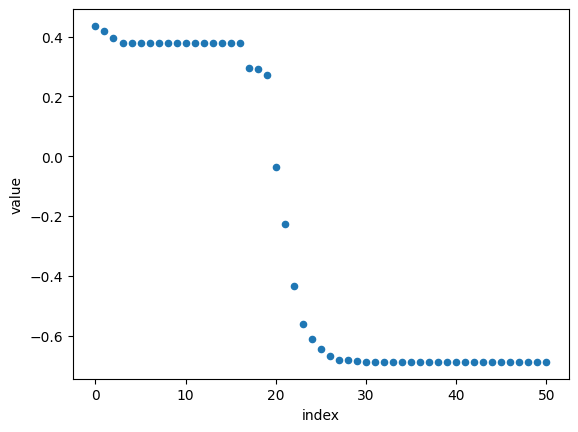

In [9]:
import pandas as pd

pd.DataFrame(after_solver_results.history).reset_index().plot(x='index',y='value', kind='scatter')
